In [1]:
import pandas as pd
import sklearn as sk
import numpy as np


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
from matplotlib import pyplot

In [6]:
df = pd.read_csv("StartupData.csv")

In [7]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [8]:
X ,y = df[["Employee Count","Internet Activity Score","Team size Senior leadership","Continent of company","Last Funding Amount"]],df["Dependent-Company Status"]

In [9]:
X.head()

,Employee Count,Internet Activity Score,Team size Senior leadership,Continent of company,Last Funding Amount
0,3.0,-1.0,2,North America,450000.0
1,NaN,125.0,4,North America,NaN
2,14.0,455.0,7,North America,2350000.0
3,45.0,-99.0,4,North America,10250000.0
4,39.0,496.0,8,North America,5500000.0


In [10]:
X.median()

Employee Count                      13.0
Internet Activity Score             60.0
Team size Senior leadership          3.0
Last Funding Amount            2800000.0
dtype: float64

## Preprocessing 

In [11]:
X = X.fillna(X.median())

In [12]:
X.isnull().sum()

Employee Count                  0
Internet Activity Score         0
Team size Senior leadership     0
Continent of company           71
Last Funding Amount             0
dtype: int64

In [13]:
X["Continent of company"].value_counts()

North America    308
Europe            76
Asia              15
South America      2
Name: Continent of company, dtype: int64

In [14]:
X['Continent of company'] = X['Continent of company'].replace(to_replace=np.nan,value="North America")

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Employee Count               472 non-null    float64
 1   Internet Activity Score      472 non-null    float64
 2   Team size Senior leadership  472 non-null    int64  
 3   Continent of company         472 non-null    object 
 4   Last Funding Amount          472 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 18.6+ KB


In [16]:
X['Continent of company'].value_counts()

North America    379
Europe            76
Asia              15
South America      2
Name: Continent of company, dtype: int64

In [17]:
le_continent = LabelEncoder()
X['Continent of company'] = le_continent.fit_transform(X['Continent of company'])

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

## Model Building

### Decision Tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Model validation

### Model Metrics(Accuracy, Precision and Recall)

In [20]:
def get_metrics(y_test,y_pred):
    print("Accuracy",accuracy_score(y_test,y_pred))
    print("Success Precision: ",precision_score(y_test,y_pred,pos_label=1))
    print("Failed Precision: ",precision_score(y_test,y_pred,pos_label=0))
    print("Success Recall: ",recall_score(y_test,y_pred))
    print("Failed Recall: ",recall_score(y_test,y_pred,pos_label=0))
    print("Confusion Matrix: \n",sk.metrics.confusion_matrix(y_test,y_pred))

### Decision Tree Metrics

In [21]:
get_metrics(y_test,y_pred)

Accuracy 0.7253521126760564
Success Precision:  0.782608695652174
Failed Precision:  0.62
Success Recall:  0.7912087912087912
Failed Recall:  0.6078431372549019
Confusion Matrix: 
 [[31 20]
 [19 72]]


### AUC ROC Curve

In [22]:
def AUC_ROC_Curve(clf,X_test,y_test,clf_name):
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Weak Classifier')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=clf_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.title(f"{clf_name} with 5 features")
    pyplot.show()


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.712


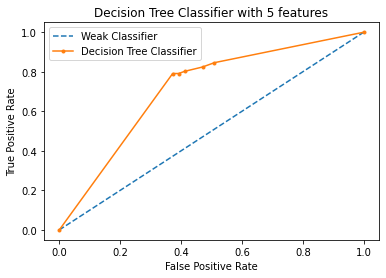

In [23]:
AUC_ROC_Curve(clf,X_test,y_test,"Decision Tree Classifier")